To Do
------
1- Study different approaches to fill numerical missing data
2- Study different approaches to fill categorical missing data

In [186]:
#parameters
missing_data_handling = "Del" #Del, Zero, Mean, Detecting
dataPath = "F:/kaggle/titanic/"

In [187]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(f'{dataPath}'.format(dataPath=dataPath)):
    for filename in filenames:
        print(os.path.join(dirname, filename))

F:/kaggle/titanic/notebook.ipynb
F:/kaggle/titanic/sample_submission.csv
F:/kaggle/titanic/spaceship-titanic.zip
F:/kaggle/titanic/test.csv
F:/kaggle/titanic/train.csv
F:/kaggle/titanic/.vs\ProjectSettings.json
F:/kaggle/titanic/.vs\slnx.sqlite
F:/kaggle/titanic/.vs\VSWorkspaceState.json
F:/kaggle/titanic/.vs\titanic\v16\.suo


Reading DataSet
---------------

In [188]:
#read data and display information
train_data_frame = pd.read_csv(f'{dataPath}train.csv'.format(dataPath=dataPath))
test_data_frame = pd.read_csv(f'{dataPath}test.csv'.format(dataPath=dataPath))

print("***********************\ntrain Data Info\n***********************")
print(train_data_frame.info())
print("***********************\ntest Data Info\n***********************")
print(test_data_frame.info())

***********************
train Data Info
***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
***********************
test Data Info
***********************
<class 'pa

Data Cleaning
-------------

In [189]:
#get columns name
columns = list(train_data_frame.columns)

#get numerical columns
numerical_columns = list(train_data_frame.select_dtypes(exclude = ['object']).columns)

#get non numerical columns
non_numerical_columns = list(set(columns) - set(numerical_columns))


In [190]:
#handle missing values in training data
# * get mean of numerical data
# * remove rows of missing categorical data

#1- set mean of numerical data
for column in numerical_columns:
    #1- get mean of the column
    mean = train_data_frame[column].mean()

    train_data_frame[column].fillna(mean, inplace = True)

#2- drop null data (will happen for categorical data only)
train_data_frame.dropna(inplace = True)

train_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   object 
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   object 
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Name          7559 non-null   object 
 13  Transported   7559 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 834.1+ KB


In [191]:
#handle missing values in testing data
# * get mean of numerical data
# * remove rows of missing categorical data

#1- set mean of numerical data
for column in numerical_columns:
    if(column == "Transported"):
        continue
    
    #1- get mean of the column
    mean = test_data_frame[column].mean()

    test_data_frame[column].fillna(mean, inplace = True)

#2- drop null data (will happen for categorical data only)
test_data_frame.dropna(inplace = True)

test_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3747 non-null   object 
 1   HomePlanet    3747 non-null   object 
 2   CryoSleep     3747 non-null   object 
 3   Cabin         3747 non-null   object 
 4   Destination   3747 non-null   object 
 5   Age           3747 non-null   float64
 6   VIP           3747 non-null   object 
 7   RoomService   3747 non-null   float64
 8   FoodCourt     3747 non-null   float64
 9   ShoppingMall  3747 non-null   float64
 10  Spa           3747 non-null   float64
 11  VRDeck        3747 non-null   float64
 12  Name          3747 non-null   object 
dtypes: float64(6), object(7)
memory usage: 409.8+ KB


In [192]:
#we should exclude name, cabin from training and testing feature vectors
train_data_frame.drop(columns=["Cabin", "Name"], inplace = True)
test_data_frame.drop(columns=["Cabin", "Name"], inplace = True)

In [193]:
train_data_frame.head(20)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.000000,0.0,0.000000,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.000000,549.0,44.000000,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.000000,6715.0,49.000000,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.000000,3329.0,193.000000,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.000000,565.0,2.000000,True
5,0005_01,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.000000,291.0,0.000000,True
6,0006_01,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.000000,0.0,0.000000,True
7,0006_02,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.000000,0.0,304.854791,True
8,0007_01,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.000000,216.0,0.000000,True
9,0008_01,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.000000,0.0,0.000000,True


Create TensorFlow Dataset
-------------------------

In [194]:
from tensorflow import feature_column
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [195]:
def df_to_dataset(dataframe, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Transported')
  passenger_id = dataframe.pop("PassengerId", inplace=True)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  ds = ds.batch(batch_size)
  return passenger_id, ds

In [196]:
f = {False:0.0, True:1.0}

train_data_frame.VIP = train_data_frame["VIP"].map(f)
test_data_frame.VIP = test_data_frame["VIP"].map(f)

train_data_frame.CryoSleep = train_data_frame["CryoSleep"].map(f)
test_data_frame.CryoSleep = test_data_frame["CryoSleep"].map(f)

In [197]:
train, test = train_test_split(train_data_frame, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

__, train_tensor = df_to_dataset(train)
test_passenger_id, test_tensor = df_to_dataset(test)
val_passenger_id, val_tensor = df_to_dataset(val)

In [198]:
train_data_frame.head(10)
#train_data_frame.info()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.000000,False
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.000000,True
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.000000,False
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.000000,False
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.000000,True
5,0005_01,Earth,0.0,PSO J318.5-22,44.0,0.0,0.0,483.0,0.0,291.0,0.000000,True
6,0006_01,Earth,0.0,TRAPPIST-1e,26.0,0.0,42.0,1539.0,3.0,0.0,0.000000,True
7,0006_02,Earth,1.0,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,304.854791,True
8,0007_01,Earth,0.0,TRAPPIST-1e,35.0,0.0,0.0,785.0,17.0,216.0,0.000000,True
9,0008_01,Europa,1.0,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,0.000000,True


Study Features Transformation
-----------------------------

In [199]:
import seaborn as sns
from matplotlib import pyplot as plt

1- Study Numerical Features
----------------------------

a. Age
******

In [200]:
len(set(train_data_frame["Age"].unique()))
#print(f"Number of age unique values is:{val}".format(len(set(train_data_frame["Age"]))))

81

80


<AxesSubplot:xlabel='Age', ylabel='Count'>

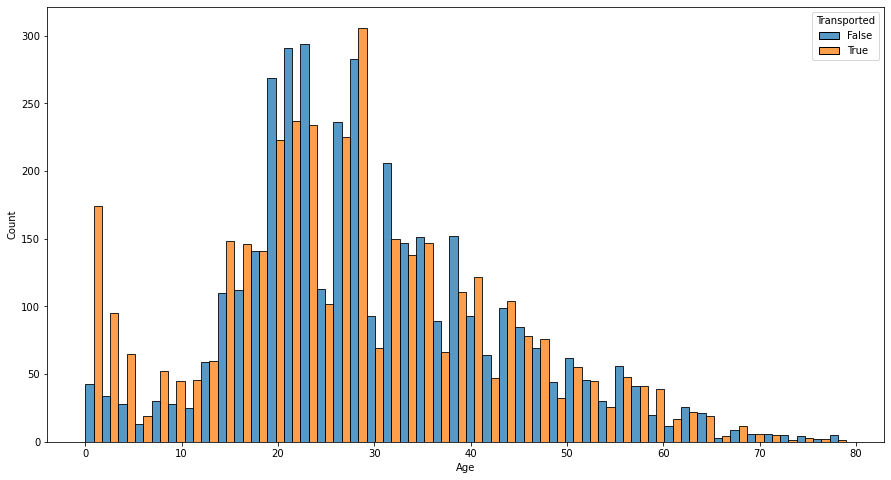

In [201]:
#1- THe relation with age
print(len(test_data_frame['Age'].unique()))

plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x="Age", hue="Transported", multiple="dodge")

the uniq of roos service values is 1


<AxesSubplot:xlabel='RoomService', ylabel='Count'>

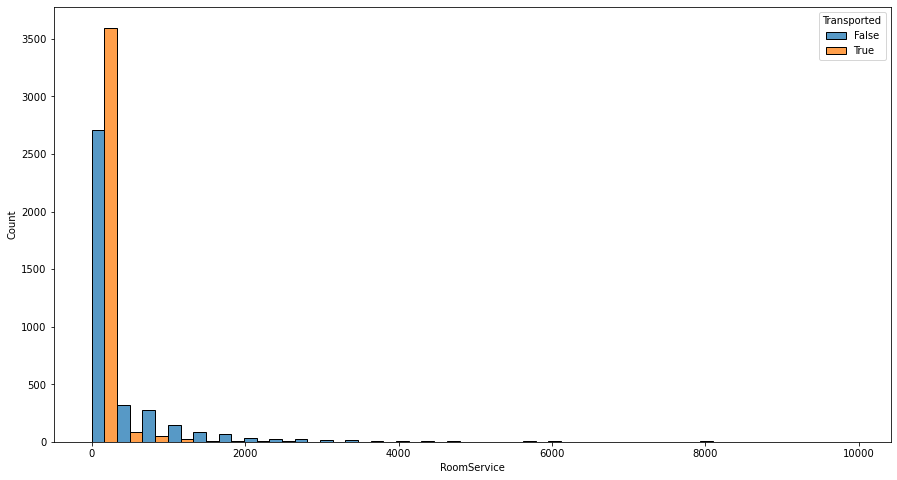

In [202]:
#2- The relation with the room service
print(f'the uniq of roos service values is {1}'.format(set(train_data_frame['RoomService'])))
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='RoomService', hue='Transported', bins=30, multiple="dodge")

the uniq of roos service values is 1


<AxesSubplot:xlabel='FoodCourt', ylabel='Count'>

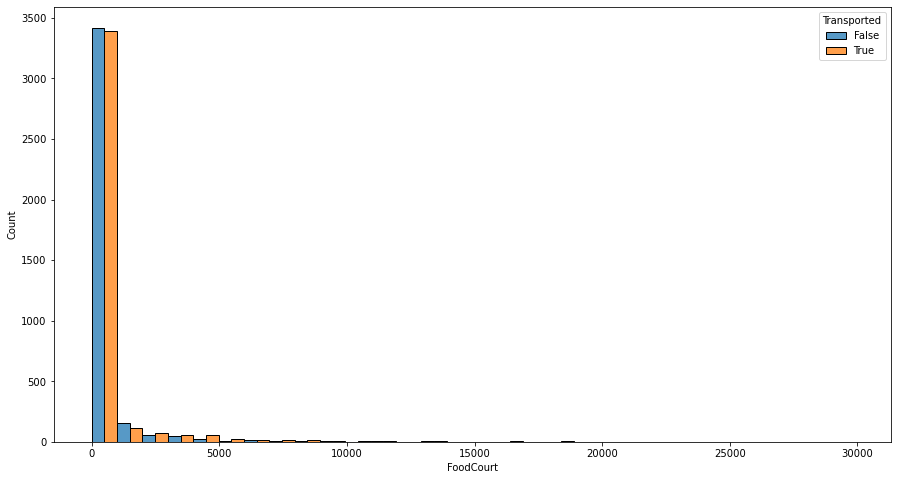

In [203]:
#2- The relation with the room service
print(f'the uniq of roos service values is {1}'.format(set(train_data_frame['FoodCourt'])))
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='FoodCourt', hue='Transported', bins=30, multiple="dodge")

the uniq of roos service values is 1


<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

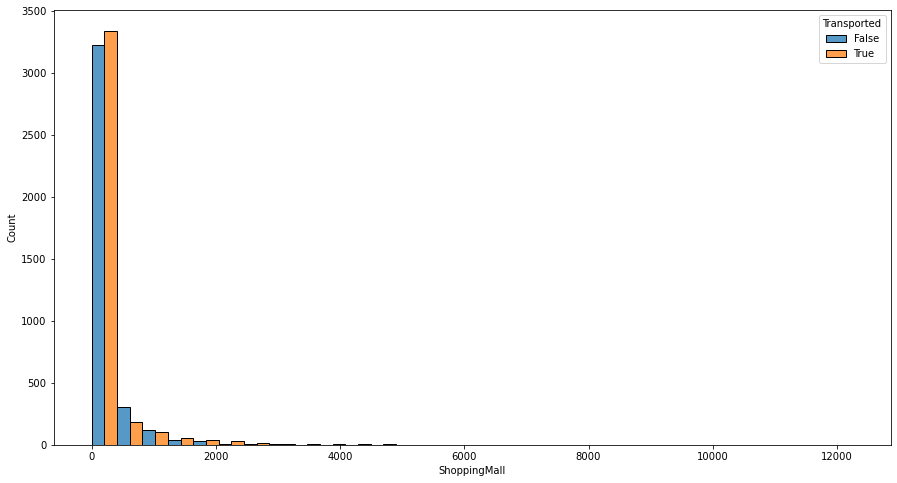

In [204]:
#2- The relation with the room service
print(f'the uniq of roos service values is {1}'.format(set(train_data_frame['ShoppingMall'])))
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='ShoppingMall', hue='Transported', bins=30, multiple="dodge")

the uniq of roos service values is 1


<AxesSubplot:xlabel='Spa', ylabel='Count'>

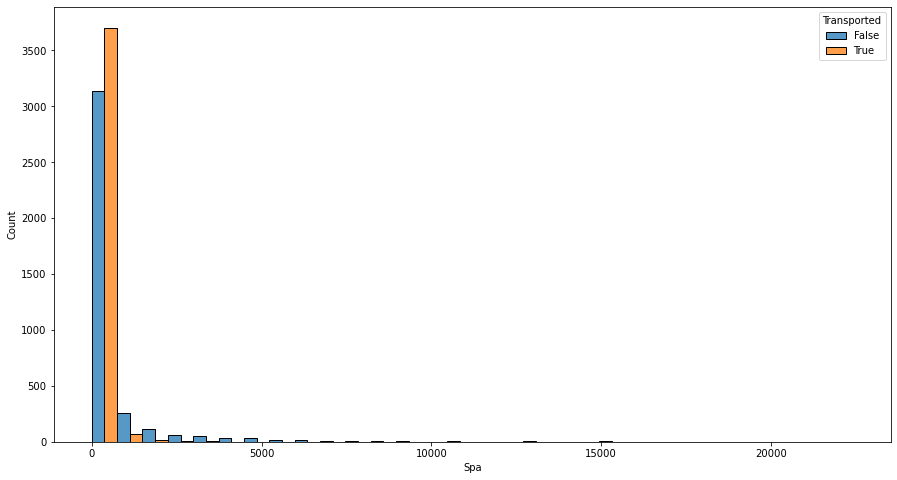

In [205]:
#2- The relation with the room service
print(f'the uniq of roos service values is {1}'.format(set(train_data_frame['Spa'])))
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='Spa', hue='Transported', bins=30, multiple="dodge")

the uniq of roos service values is 1


<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

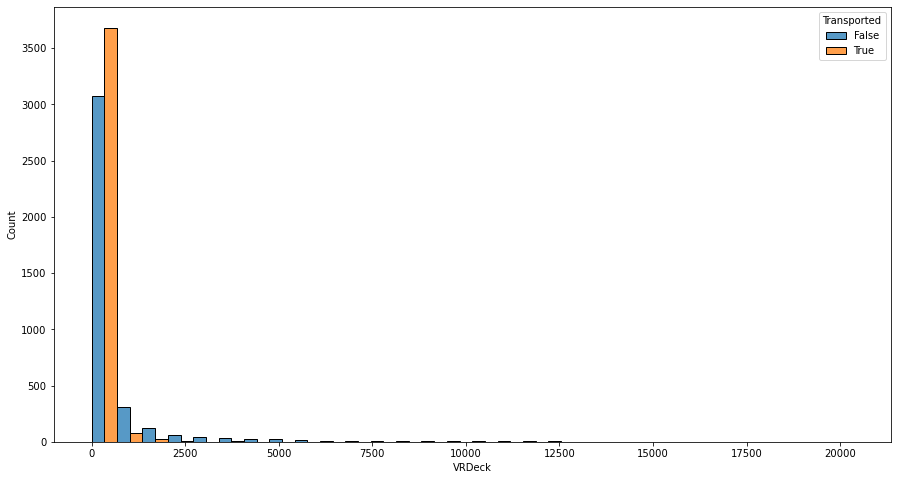

In [206]:
#2- The relation with the room service
print(f'the uniq of roos service values is {1}'.format(set(train_data_frame['VRDeck'])))
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='VRDeck', hue='Transported', bins=30, multiple="dodge")

b. make transformations for numerical columns
********************************************

In [207]:
feature_columns = []

feature_columns.append(feature_column.numeric_column('Age'))
feature_columns.append(feature_column.numeric_column('RoomService'))
feature_columns.append(feature_column.numeric_column('FoodCourt'))
feature_columns.append(feature_column.numeric_column('ShoppingMall'))
feature_columns.append(feature_column.numeric_column('Spa'))
feature_columns.append(feature_column.numeric_column('VRDeck'))

c. study categorical features
******************************

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

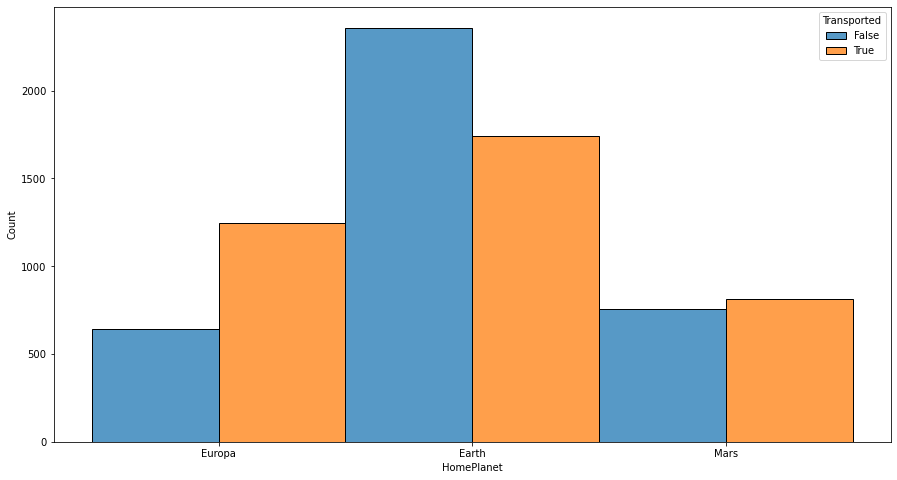

In [208]:
#2- The relation with the room service
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='HomePlanet', hue='Transported', bins=30, multiple="dodge")

<AxesSubplot:xlabel='VIP', ylabel='Count'>

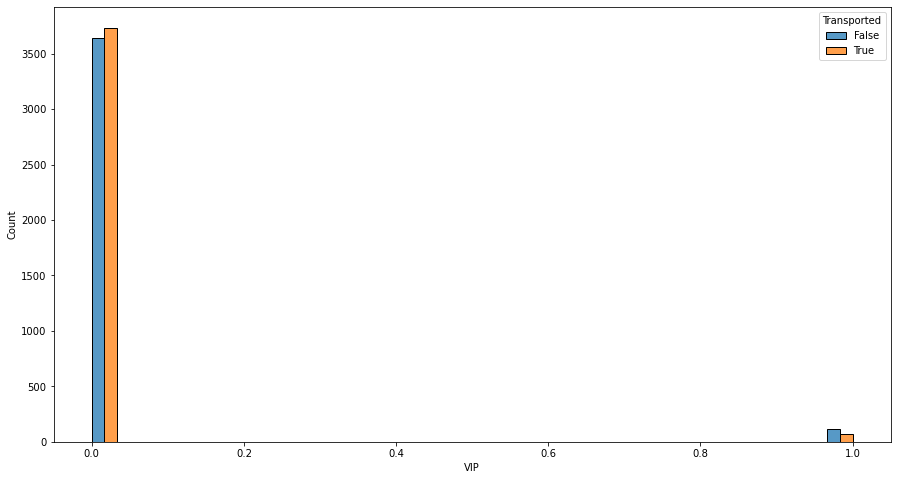

In [209]:
#2- The relation with the room service
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='VIP', hue='Transported', bins=30, multiple="dodge")

<AxesSubplot:xlabel='CryoSleep', ylabel='Count'>

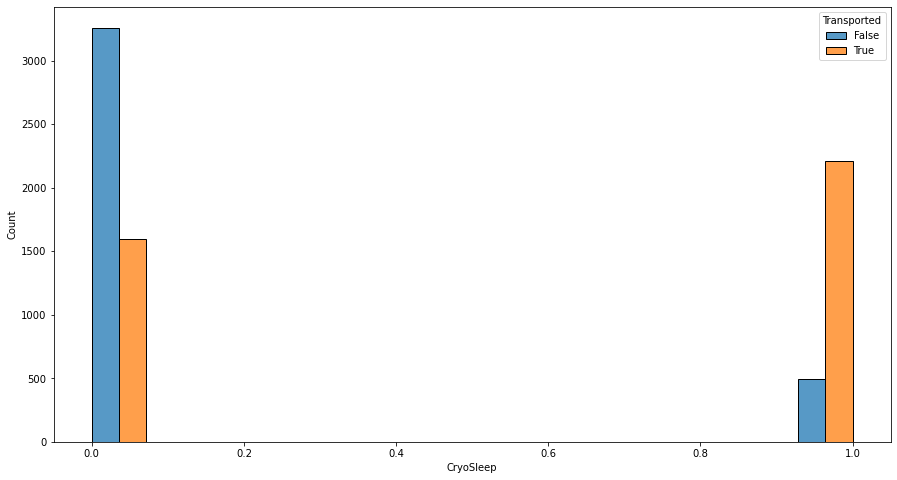

In [210]:
#2- The relation with the room service
plt.figure(figsize=(15,8))
sns.histplot(data=train_data_frame, x='CryoSleep', hue='Transported', multiple="dodge")

d. Construct Feature Vector
****************************

In [211]:
train_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   float64
 3   Destination   7559 non-null   object 
 4   Age           7559 non-null   float64
 5   VIP           7559 non-null   float64
 6   RoomService   7559 non-null   float64
 7   FoodCourt     7559 non-null   float64
 8   ShoppingMall  7559 non-null   float64
 9   Spa           7559 non-null   float64
 10  VRDeck        7559 non-null   float64
 11  Transported   7559 non-null   bool   
dtypes: bool(1), float64(8), object(3)
memory usage: 716.0+ KB


In [212]:
feature_columns = []

In [213]:
#1- Numerical features
feature_columns.append(feature_column.numeric_column("CryoSleep"))
feature_columns.append(feature_column.numeric_column("Age"))
feature_columns.append(feature_column.numeric_column("VIP"))
feature_columns.append(feature_column.numeric_column("RoomService"))
feature_columns.append(feature_column.numeric_column("FoodCourt"))
feature_columns.append(feature_column.numeric_column("ShoppingMall"))
feature_columns.append(feature_column.numeric_column("Spa"))
feature_columns.append(feature_column.numeric_column("VRDeck"))

In [215]:
#2- Categorical features
print(train_data_frame.Destination.unique())
print(train_data_frame.HomePlanet.unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
['Europa' 'Earth' 'Mars']


In [216]:
indicator_column_names = ["HomePlanet", "Destination"]

for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, train_data_frame[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

Create a feature layer
--------------------------

In [218]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

Create, compile, and train the model
------------------------------------

In [223]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(128, activation='sigmoid'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_tensor,
          validation_data=val_tensor,
          epochs=10)

Epoch 1/10
152/152 [==============================] - 3s 9ms/step - loss: 0.5614 - accuracy: 0.6893 - val_loss: 0.5256 - val_accuracy: 0.7413
Epoch 2/10
152/152 [==============================] - 1s 5ms/step - loss: 0.5094 - accuracy: 0.7662 - val_loss: 0.5179 - val_accuracy: 0.7595
Epoch 3/10
152/152 [==============================] - 1s 5ms/step - loss: 0.5007 - accuracy: 0.7747 - val_loss: 0.5073 - val_accuracy: 0.7653
Epoch 4/10
152/152 [==============================] - 1s 5ms/step - loss: 0.4915 - accuracy: 0.7697 - val_loss: 0.4984 - val_accuracy: 0.7587
Epoch 5/10
152/152 [==============================] - 1s 6ms/step - loss: 0.4798 - accuracy: 0.7724 - val_loss: 0.4906 - val_accuracy: 0.7612
Epoch 6/10
152/152 [==============================] - 1s 5ms/step - loss: 0.4748 - accuracy: 0.7705 - val_loss: 0.4886 - val_accuracy: 0.7504
Epoch 7/10
152/152 [==============================] - 1s 5ms/step - loss: 0.4732 - accuracy: 0.7666 - val_loss: 0.4850 - val_accuracy: 0.7579
Epoch 

### Evaluate Model

In [ ]:
loss, accuracy = model.evaluate(test_tensor)
print("Accuracy", accuracy)